------Data Cookbook - Miles Wilderman ------
9 May, 2023 ------
Professor Wirfs-Brock ------
Introduction to Data Science ------

1) Importing and Cleaning a Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset that I will be using to explain concepts.

In [5]:
JacksonHole = pd.read_csv("Jackson Hole - Wyoming.csv")
JacksonHole

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,2-Jan-17,8 cm,8 cm,74 cm
1,4-Jan-17,8 cm,16 cm,71 cm
2,5-Jan-17,8 cm,24 cm,76 cm
3,8-Jan-17,10 cm,34 cm,81 cm
4,10-Jan-17,20 cm,54 cm,79 cm
...,...,...,...,...
688,22-Dec-09,3 cm,1029 cm,66 cm
689,23-Dec-09,3 cm,1032 cm,66 cm
690,24-Dec-09,5 cm,1037 cm,66 cm
691,30-Dec-09,8 cm,1045 cm,64 cm


This dataset has some annoying values to work with in each column. We need to take out the units and make them integers so that we can plot and manipulate them. 

In [7]:
JacksonHole["Season Snowfall Total"].dtype

dtype('O')

This means that the data is in object form - not what we want. 

In [8]:
JacksonHole['Season Snowfall Total'] = JacksonHole['Season Snowfall Total'].str.replace('cm', '')
JacksonHole['Season Snowfall Total'] = JacksonHole['Season Snowfall Total'].astype(int)

In [9]:
JacksonHole

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,2-Jan-17,8 cm,8,74 cm
1,4-Jan-17,8 cm,16,71 cm
2,5-Jan-17,8 cm,24,76 cm
3,8-Jan-17,10 cm,34,81 cm
4,10-Jan-17,20 cm,54,79 cm
...,...,...,...,...
688,22-Dec-09,3 cm,1029,66 cm
689,23-Dec-09,3 cm,1032,66 cm
690,24-Dec-09,5 cm,1037,66 cm
691,30-Dec-09,8 cm,1045,64 cm


We see in the column "Season Snowfall Total the cm is removed and if we check the data type we can see that it is now of type integer 64. 

In [10]:
JacksonHole["Season Snowfall Total"].dtype

dtype('int64')

If we want to work with any other columns we will have to perform the same preprocessing as shown before. 

2) Sorting values

In [14]:
JacksonHole["Season Snowfall Total"].sort_values(ascending=True)

55        3
350       3
131       5
351       6
282       8
       ... 
277    1430
278    1466
279    1514
280    1542
281    1562
Name: Season Snowfall Total, Length: 693, dtype: int64

With this we can see the values sorted in order from lowest to highest. We can also see the index next to the values in this list which can also be very helpful. 

We can also get just the min or max value with this simple function. 

In [15]:
JacksonHole_Total_Best = JacksonHole["Season Snowfall Total"].max()
JacksonHole_Total_Best

1562

3) Plotting Values

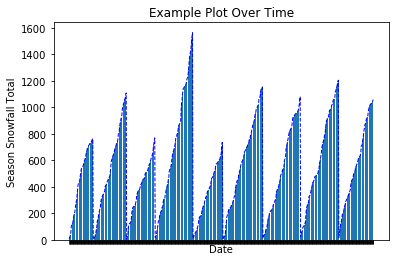

In [24]:
x = JacksonHole["Date"]
y = JacksonHole["Season Snowfall Total"]

plt.bar(x, y)
plt.xlabel('Date')
plt.ylabel('Season Snowfall Total')
plt.title('Example Plot Over Time')
plt.plot(x, y, color='blue', linestyle='--', linewidth=1)
#plt.grid(True)                                                  if  you want grid lines on graph
#plt.xticks(np.arange(0, 50, 1), np.arange(0, 10000, 1)[::10])   can change which x labels are visible

plt.xticks(visible=False)                                       #or just make them invisble

#plt.bar(x[2], y[2], color='r')                                  if you want a specific bar highlighted

plt.show()

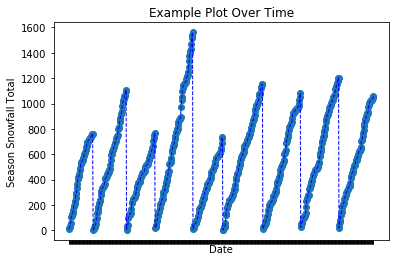

In [25]:
x = JacksonHole["Date"]
y = JacksonHole["Season Snowfall Total"]

plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('Season Snowfall Total')
plt.title('Example Plot Over Time')
plt.plot(x, y, color='blue', linestyle='--', linewidth=1)
#plt.grid(True)                                                  if  you want grid lines on graph
#plt.xticks(np.arange(0, 50, 1), np.arange(0, 10000, 1)[::10])   can change which x labels are visible

plt.xticks(visible=False)                                       #or just make them invisble

#plt.bar(x[2], y[2], color='r')                                  if you want a specific bar highlighted

plt.show()

Knowing when to use different kinds of data visualizations is important, but just knowing the differnt ways to do them is more important in my opinion because you can always choose the best looking one after you have implemented both. 

4) Merging Datasets in different ways. 

I will import another dataset so that we can merge two together. 

In [34]:
Snowbird = pd.read_csv("Snowbird - Utah.csv")
Snowbird

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,2-Jan-17,13 cm,13 cm,152 cm
1,3-Jan-17,46 cm,59 cm,188 cm
2,4-Jan-17,5 cm,64 cm,188 cm
3,5-Jan-17,28 cm,92 cm,185 cm
4,8-Jan-17,8 cm,100 cm,185 cm
...,...,...,...,...
581,23-Dec-09,13 cm,1150 cm,119 cm
582,24-Dec-09,3 cm,1153 cm,119 cm
583,25-Dec-09,3 cm,1156 cm,117 cm
584,27-Dec-09,3 cm,1159 cm,117 cm


First we will merge the Snowbird dataset on top of the Telluride dataset. 

We see that Snowbird has 586 rows, and after we merge the two we see that there are 1279 rows in the total dataset. What this code does is it puts the values from Telluride underneath Snowbird stacking it on top. 

In [35]:
merged_df = pd.concat([Snowbird, JacksonHole], axis=0, ignore_index=True)

In [36]:
merged_df

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,2-Jan-17,13 cm,13 cm,152 cm
1,3-Jan-17,46 cm,59 cm,188 cm
2,4-Jan-17,5 cm,64 cm,188 cm
3,5-Jan-17,28 cm,92 cm,185 cm
4,8-Jan-17,8 cm,100 cm,185 cm
...,...,...,...,...
1274,22-Dec-09,3 cm,1029,66 cm
1275,23-Dec-09,3 cm,1032,66 cm
1276,24-Dec-09,5 cm,1037,66 cm
1277,30-Dec-09,8 cm,1045,64 cm


We can also merge with the merge function. This can achieve a wider array of options, but is tougher to work with because you need to merge on something. 

In [39]:
merged_df2 = Snowbird.merge(JacksonHole, on="Date", how="left")
merged_df2

,Date,24 hr New Snow_x,Season Snowfall Total_x,Base Depth_x,24 hr New Snow_y,Season Snowfall Total_y,Base Depth_y
0,2-Jan-17,13 cm,13 cm,152 cm,8 cm,8.0,74 cm
1,3-Jan-17,46 cm,59 cm,188 cm,NaN,NaN,NaN
2,4-Jan-17,5 cm,64 cm,188 cm,8 cm,16.0,71 cm
3,5-Jan-17,28 cm,92 cm,185 cm,8 cm,24.0,76 cm
4,8-Jan-17,8 cm,100 cm,185 cm,10 cm,34.0,81 cm
...,...,...,...,...,...,...,...
581,23-Dec-09,13 cm,1150 cm,119 cm,3 cm,1032.0,66 cm
582,24-Dec-09,3 cm,1153 cm,119 cm,5 cm,1037.0,66 cm
583,25-Dec-09,3 cm,1156 cm,117 cm,NaN,NaN,NaN
584,27-Dec-09,3 cm,1159 cm,117 cm,NaN,NaN,NaN
